# Numerical Optimization

In [1]:
import autograd.numpy as np
import autograd as ag

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

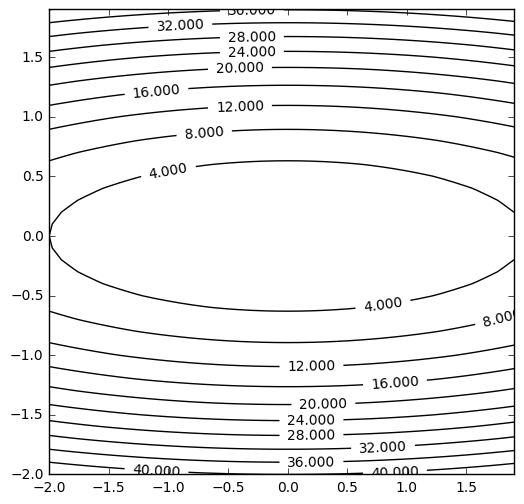

In [3]:
def f(xy):
    x, y = xy
    return x**2 + 10*y**2
X, Y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1))

g = ag.grad(f)
h = ag.hessian(f)

def plot_f():
    fig = plt.figure(figsize=(6,6))
    CS = plt.contour(X, Y, f((X, Y)), 10, colors='k')
    plt.clabel(CS, inline=1, fontsize=10)
    
plot_f()

## Stochastic gradient descent

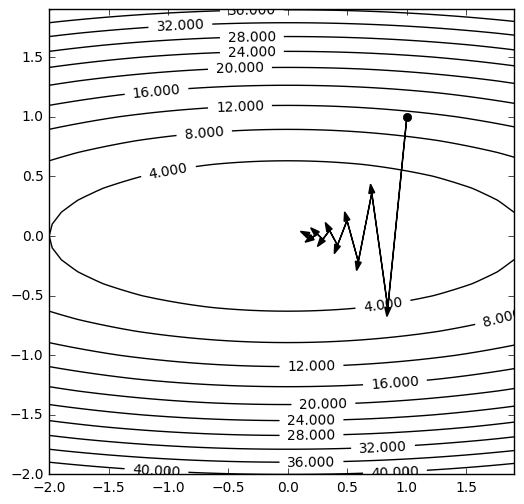

In [4]:
def plot_path(path):
    plot_f()
    x0, y0 = path[0]
    plt.plot(x0, y0, marker='o', color='k')
    for xy1 in path[1:]:
        x1, y1 = xy1
        plt.arrow(x0, y0, x1-x0, y1-y0, head_width=0.05, color='k')
        x0, y0 = x1, y1

xy = np.array([1., 1.])
path = [xy]
eta = 0.08
for iteration in range(10):
    xy1 = xy - eta*g(xy)
    path.append(xy1)
    xy = xy1
plot_path(path)

## Newton's method

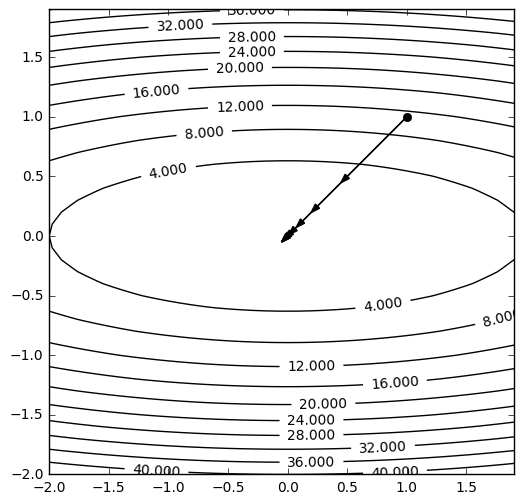

In [5]:
xy = np.array([1., 1.])
path = [xy]
eta = 0.5
for iteration in range(10):
    hinv = np.linalg.inv(h(xy))
    xy1 = xy - eta*hinv@g(xy)
    path.append(xy1)
    xy = xy1
plot_path(path)

## Gradient clipping

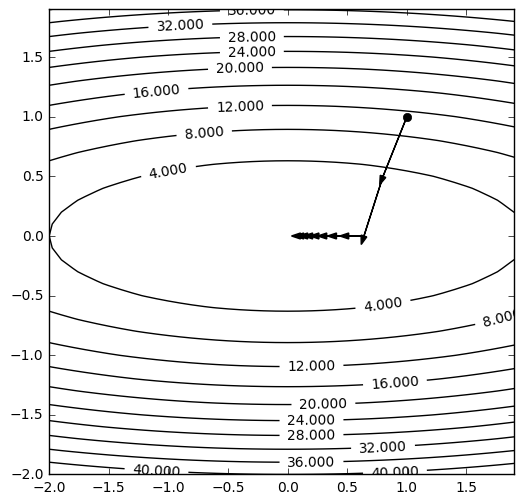

In [6]:
xy = np.array([1., 1.])
path = [xy]
eta = 0.1
for iteration in range(10):
    xy1 = xy - eta*np.clip(g(xy), -5, 5)
    path.append(xy1)
    xy = xy1
plot_path(path)

## Adagrad

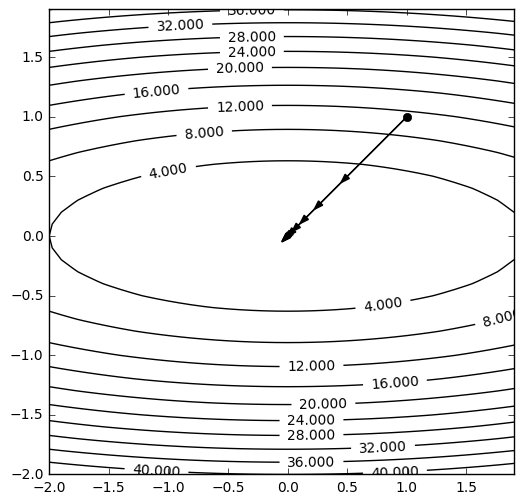

In [7]:
xy = np.array([1., 1.])
path = [xy]
gss = np.full_like(xy, 1e-6)
eta = 0.5
for iteration in range(10):
    gxy = g(xy)
    gss += gxy**2
    xy1 = xy - eta*gxy/np.sqrt(gss)
    path.append(xy1)
    xy = xy1
plot_path(path)